In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Problem Statement:** A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Let's Load the dataset

In [3]:
df = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# drop last two columns
df.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

#Also drop CLIENTNUM because it's just the customer ID
df.drop(['CLIENTNUM'], axis=1, inplace=True)

Store the copy of our original dataset

In [5]:
df_original = df.copy

Firstly, we will check the features present in our data and then we will look at their data types.

In [6]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
s = df.shape
print(f'The dataset contains {s[0]} rows and {s[1]-1} independent columns and 1 target variable')

The dataset contains 10127 rows and 19 independent columns and 1 target variable


In [8]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

**object**: Object format means variables are categorical. Categorical variables in our dataset are: 'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'

**int64**: It represents the integer variables: Integer variables in our dataset are: 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct'

**float64**: It represents the variables with decimal values. Float variable in our dataset are: 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'

Let's look at the shape of our dataset

In [9]:
df.shape

(10127, 20)

We have **10127 rows** and **20 columns** in the dataset

## Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.

In [10]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [11]:
df['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

<Axes: xlabel='Attrition_Flag'>

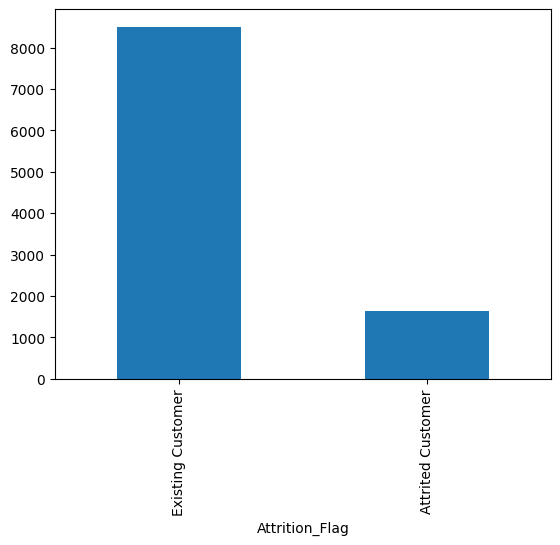

In [12]:
df['Attrition_Flag'].value_counts().plot.bar()

Clearly the proportion of Attrited customers are far less than the existing customers. So, from the total customers given in this dataset 16% of the customers have left the credit card services.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.
* **Categorical features:** These features have categories  ('Gender', 'Marital_Status', 'Card_Category')

* **Ordinal features:** Variables in categorical features having some order involved ('Education_Level', 'Income_Category')

* **Numerical features:** These features have numerical values ('Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio')

## Data Visualization
### Independent Variable (Categorical)

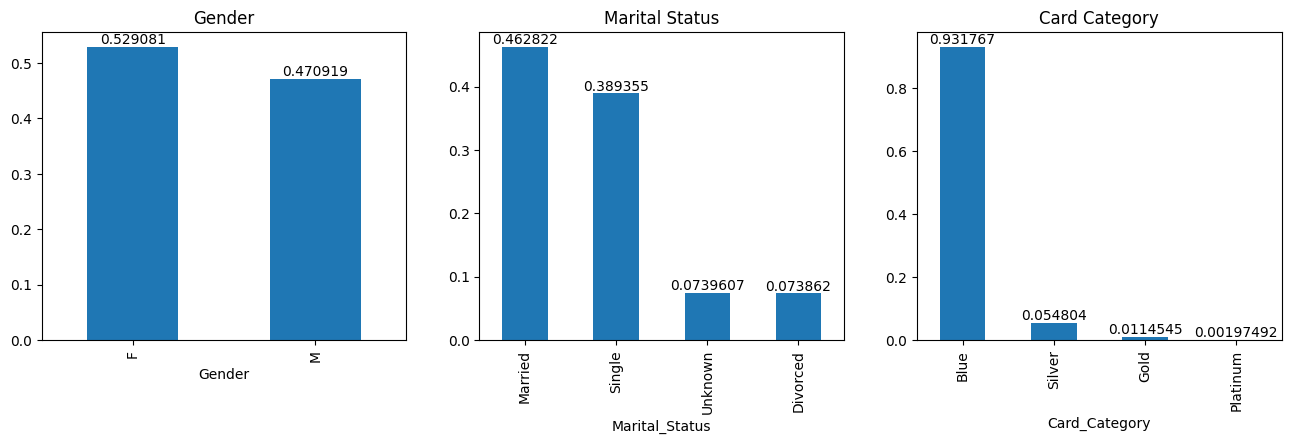

In [13]:
plt.figure(1)
plt.subplot(1, 3, 1)
a = df['Gender'].value_counts(normalize=True).plot.bar(figsize=(16,4), title='Gender')
plt.bar_label(a.containers[0])

plt.subplot(1, 3, 2)
b = df['Marital_Status'].value_counts(normalize=True).plot.bar(title="Marital Status")
plt.bar_label(b.containers[0])

plt.subplot(1, 3, 3)
c = df['Card_Category'].value_counts(normalize=True).plot.bar(title="Card Category")
plt.bar_label(c.containers[0])

plt.show()

It can be inferred from the above plots that:
* **Around 53%** of the customers are **Female**
* Most of the customers are **married (Around 46%)** and least number of customers are **Divorced (Around 0.073)**
* **Around 93%** of the customers have a **Blue card** and least number of customers have a **Platinum card (Around 0.0019)**



### Independent Variable (Ordinal)

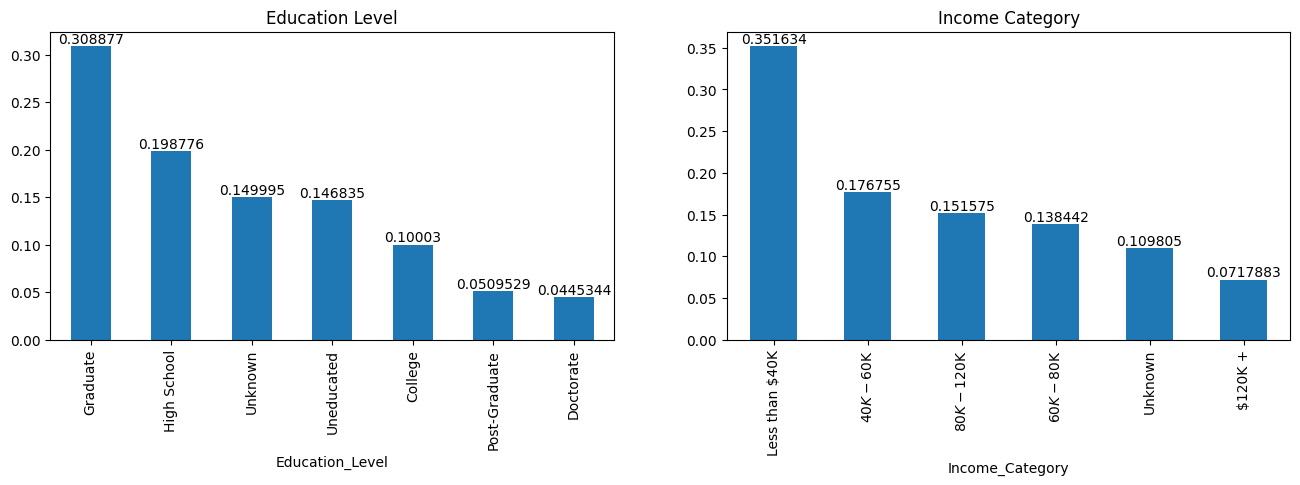

In [14]:
plt.figure(1)
plt.subplot(1, 2, 1)
a = df['Education_Level'].value_counts(normalize=True).plot.bar(figsize=(16, 4), title="Education Level")
plt.bar_label(a.containers[0])

plt.subplot(1, 2, 2)
b = df['Income_Category'].value_counts(normalize=True).plot.bar(title="Income Category")
plt.bar_label(b.containers[0])

plt.show()

Following information can be inferred from the above plot:
* Most of the customers are **Graduates (around 30%)** and least number of customers have a **doctorate (around 0.044)**
* The majority of customers **(about 35%) report an income of less than dollar 40,000**, with **the fewest customers having incomes exceeding dollar 120,000.**

### Independent Variable (Numerical)
There total 15 numerical features in the dataset, so let's visualize them

In [15]:
df.select_dtypes(["int","float"]).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Let's look at the distribution of Age first

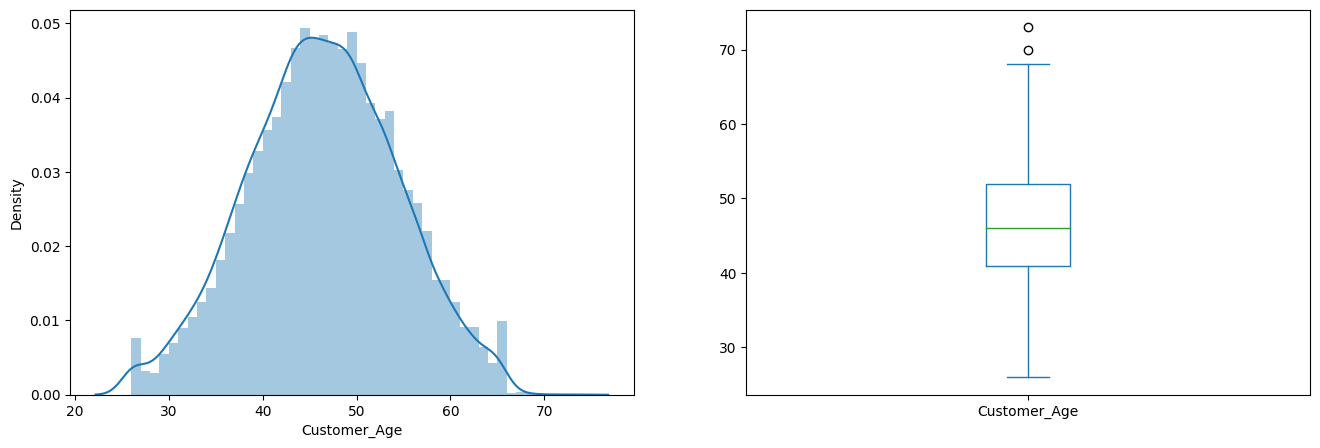

In [16]:
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df['Customer_Age'])

plt.subplot(1, 2, 2)
df['Customer_Age'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that the Age column has a normal distribution with just 2 outliers which we can easily handle.

Next we'll look at the Dependent count

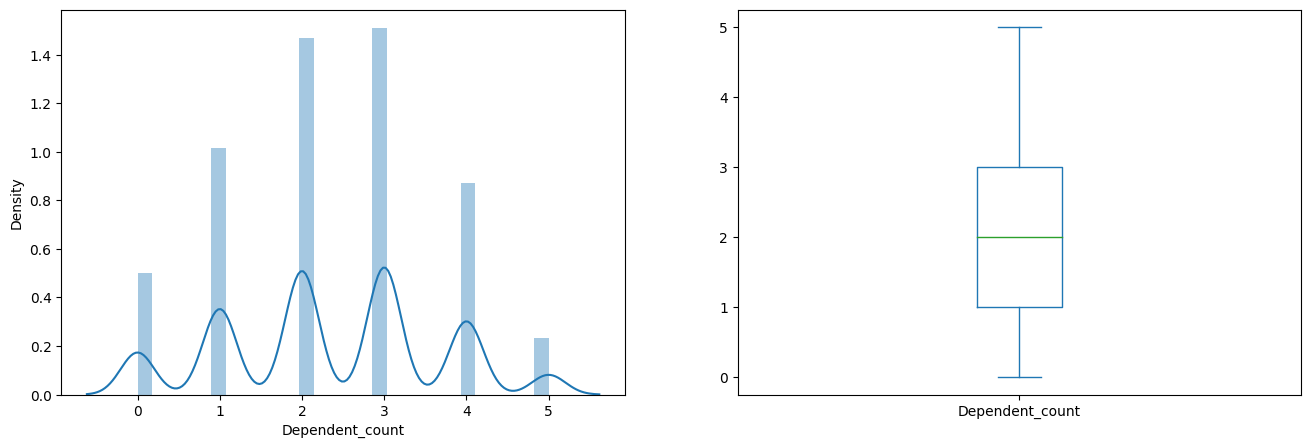

In [17]:
plt.figure(1)
plt.subplot(1, 2, 1)
sns.distplot(df['Dependent_count'])

plt.subplot(1, 2, 2)
df['Dependent_count'].plot.box(figsize=(16,5))
plt.show()

From the above distribution it is clear that most of the customers have closed 2-3 accounts with no outliers. Looking at the distribution we can covert this this variable into a categorical one

In [18]:
to_replace = sorted(df['Dependent_count'].unique().tolist())
replacements = ["0","1","2","3","4","5"]
df['Dependent_count'].replace(to_replace, replacements, inplace=True)

Now we can look at all the other numerical columns in our dataset

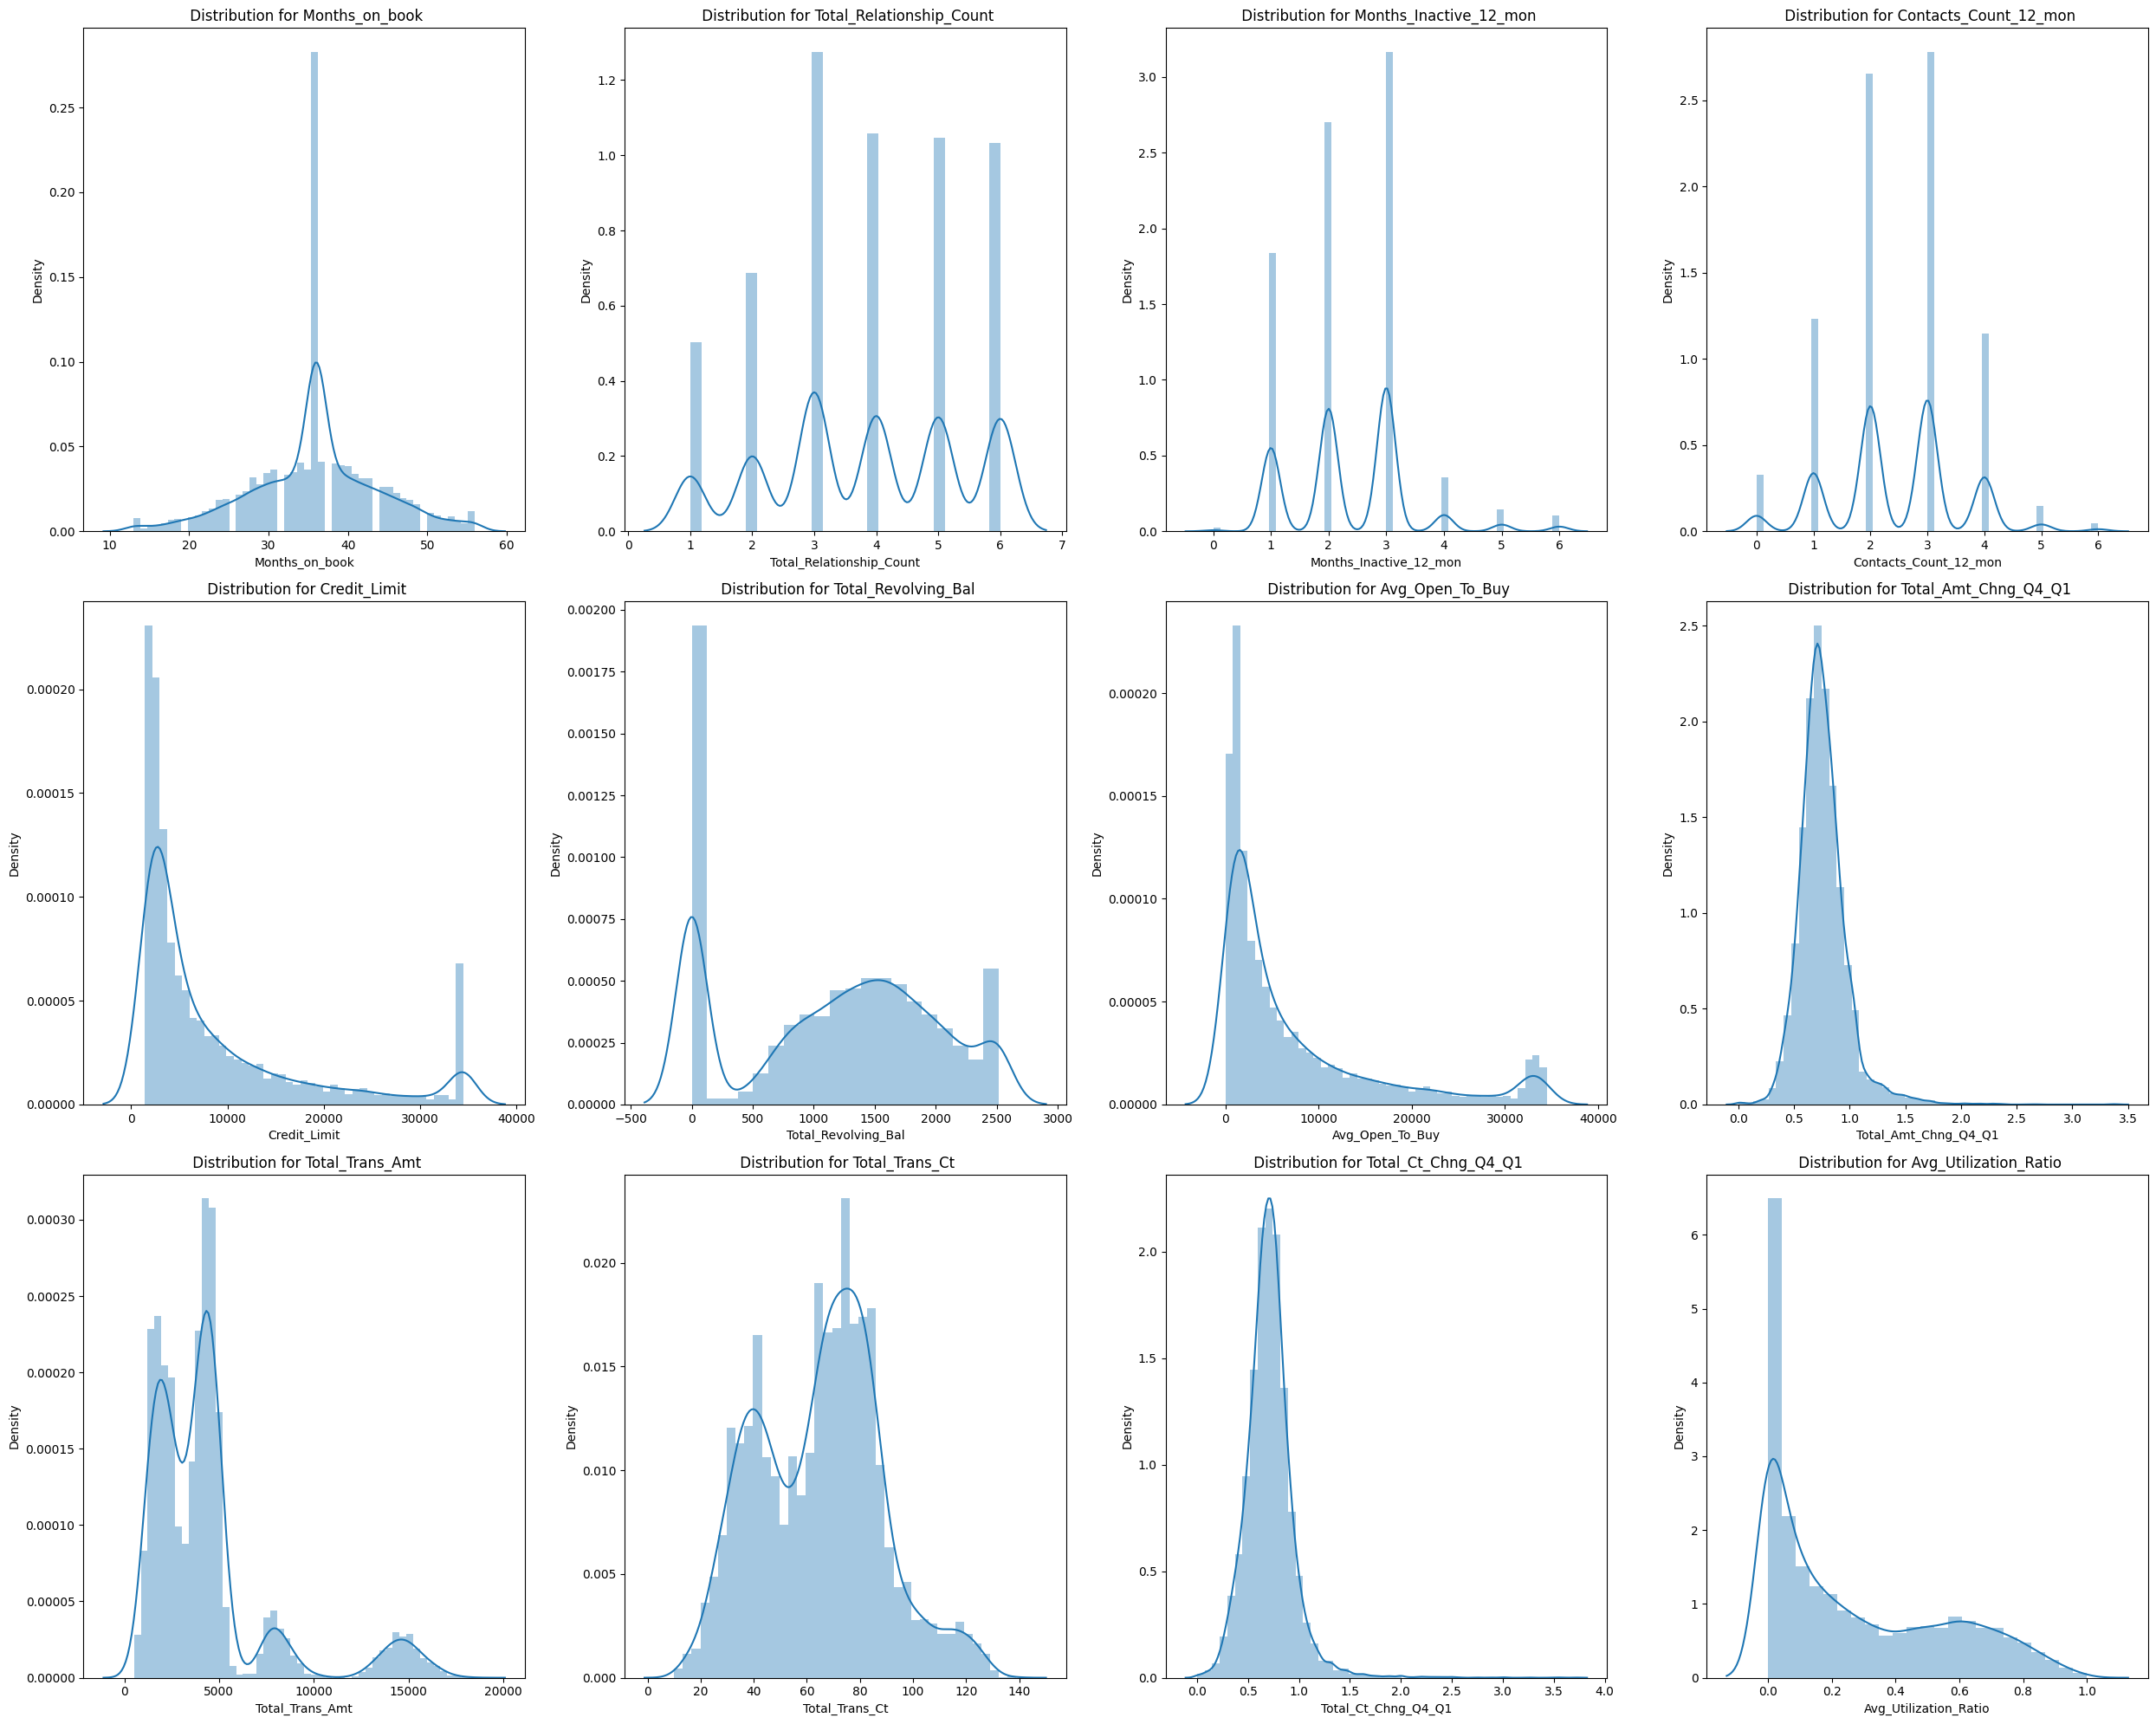

In [19]:
fig, axes = plt.subplots(nrows=3, ncols =4, figsize=(25,20))
plt.subplots_adjust(hspace=0.5)
num_col = ['Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio']

for i , feature in enumerate(num_col):
    row_index = i//4
    col_index = i%4
    
    sns.distplot(df[feature], ax = axes[row_index, col_index])

    axes[row_index, col_index].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

* Firstly I will convert 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon' into categorical features
* Next, we can see that most the distributions are skewed and requires normalization.
* 'Months_on_book', 'Total_Revolving_Bal', 'Total_Trans_Ct' has nearly normalize distribution
* 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',  'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio has right skewed distributions we will deal with them individually in the further processing

In [20]:
to_replace = sorted(df['Total_Relationship_Count'].unique().tolist())
replacements = ["1","2","3","4","5","6"]
df['Total_Relationship_Count'].replace(to_replace, replacements, inplace=True)

to_replace = sorted(df['Months_Inactive_12_mon'].unique().tolist())
replacements = ["0","1","2","3","4","5","6"]
df['Months_Inactive_12_mon'].replace(to_replace, replacements, inplace=True)

to_replace = sorted(df['Contacts_Count_12_mon'].unique().tolist())
replacements = ["0","1","2","3","4","5","6"]
df['Contacts_Count_12_mon'].replace(to_replace, replacements, inplace=True)

Now we can look at all the outliers in numerical columns in our dataset

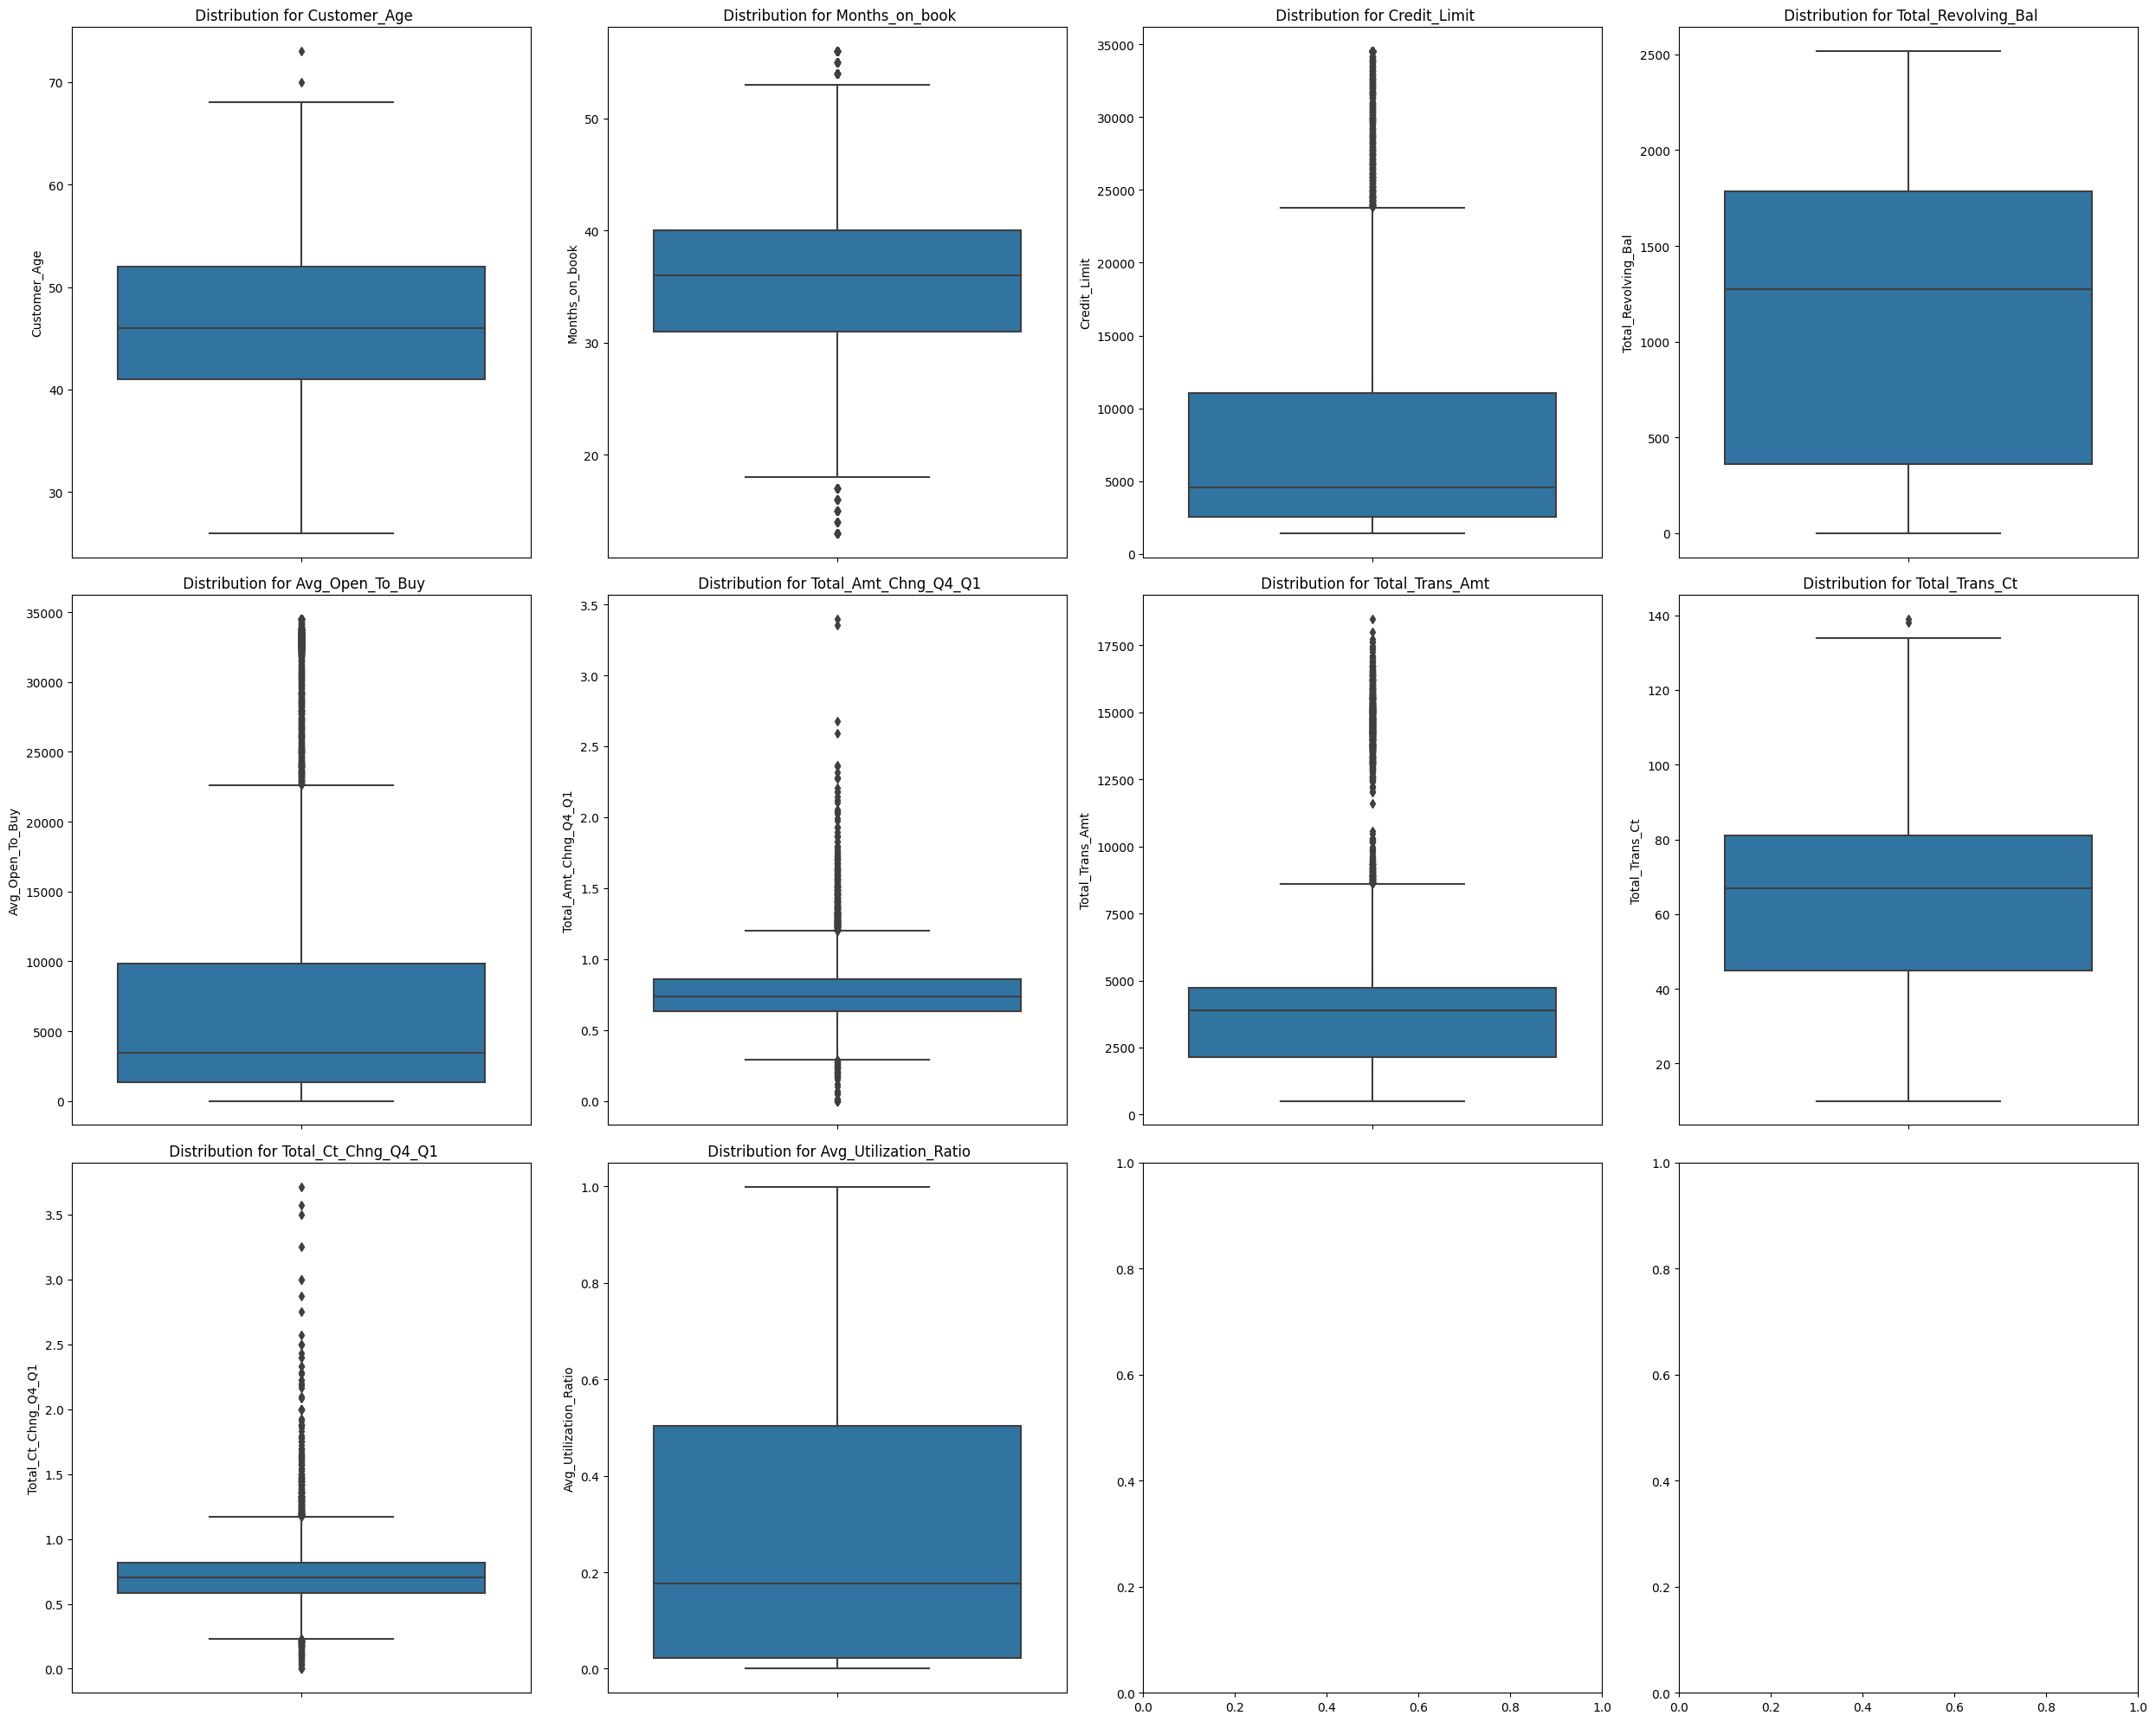

In [21]:
fig, axes = plt.subplots(nrows=3, ncols =4, figsize=(25,20))
plt.subplots_adjust(hspace=0.5)
num_col = ['Customer_Age', 'Months_on_book', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio']

for i , feature in enumerate(num_col):
    row_index = i//4
    col_index = i%4
    
    sns.boxplot(data=df, y=feature, ax = axes[row_index, col_index], orient='v') 

    axes[row_index, col_index].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

* No outliers in column: Total_Revolving_Bal, Avg_Utilization_Ratio
* Few outliers in column: Customer_Age, Months_on_book, Total_Trans_Ct
* More outliers in column: Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt. Total_Ct_Chng_Q4_Q1

### Categorical Independent Variable v/s Target Variable
First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of exisiting customers and Attrited Customer. 

In [22]:
df.select_dtypes("object").columns

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon'],
      dtype='object')

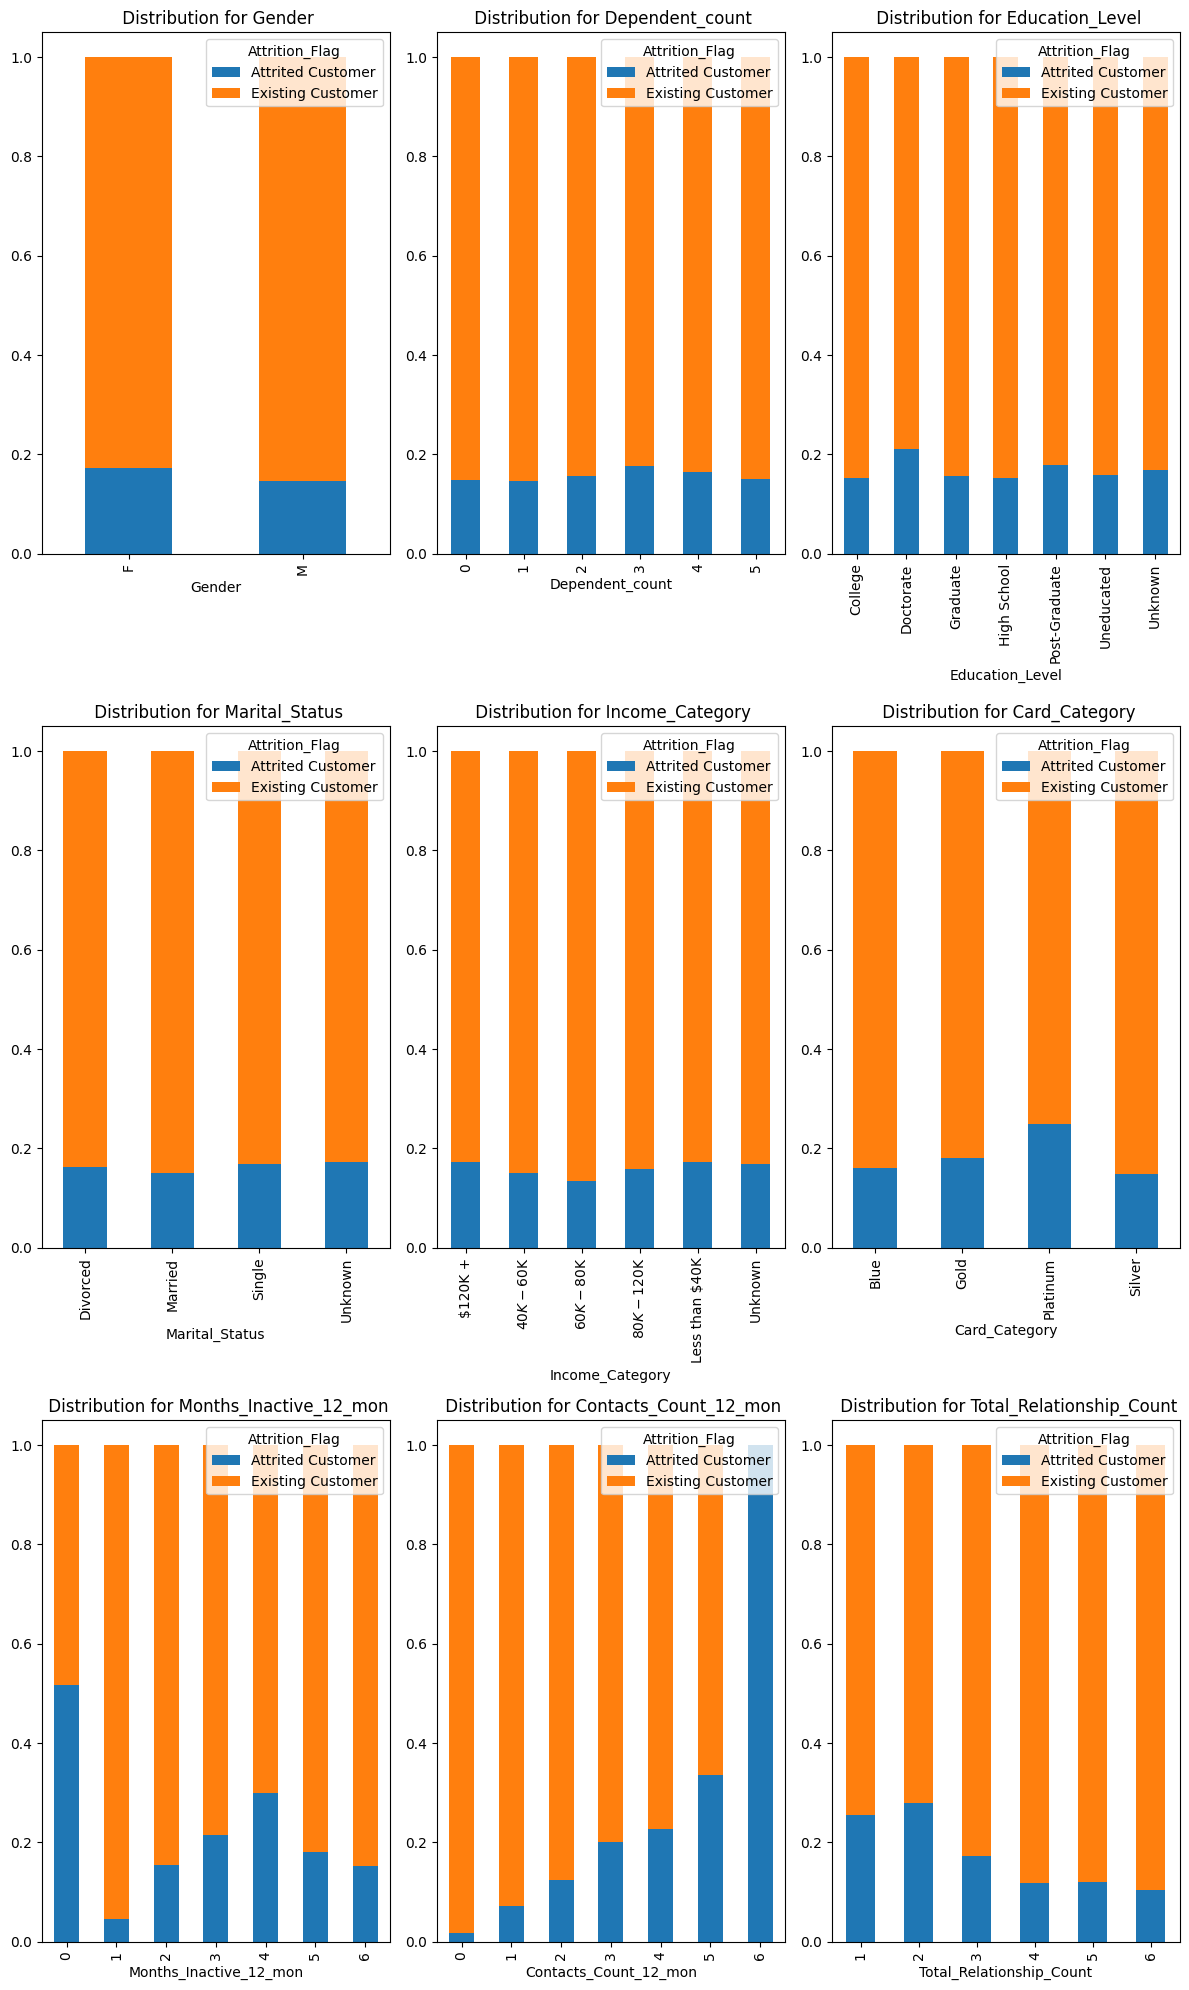

In [23]:
fig, axes = plt.subplots(nrows=3, ncols =3)
plt.subplots_adjust(hspace=0.9)
num_col = ['Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Relationship_Count']

for i , feature in enumerate(num_col):
    row_index = i//3
    col_index = i%3
    
    plot=pd.crosstab(df[feature],df['Attrition_Flag']) 
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,20), ax = axes[row_index, col_index])
    axes[row_index, col_index].set_title(f" Distribution for {feature}")


plt.tight_layout()
plt.show()

1. More females left their accounts than males.
2. Most customers left three of their accounts.
3. Customers with a doctorate tend to attrite more than others.
4. The "unknown" category in marital status has the highest number of attrited customers.
5. Customers with incomes under dollar 40,000 have the highest attrition rate.
6. Platinum cardholders are the fewest and have a higher attrition rate.
7. Most customers with zero inactive months left their accounts.
8. Customers with only six months of banking history are more likely to attrite as time passes, indicating potential service dissatisfaction.
9. Loyal Customers have higher relationship count with the bank

### Numerical Independent Variable vs Target Variable
Let's look at the median value of the credit limit for people who left and did not lef the account. I've use median as the central tendency measure because as we saw earlier this distribution is hightly right skewed

[Text(0, 0, '4178'), Text(0, 0, '4643.5')]

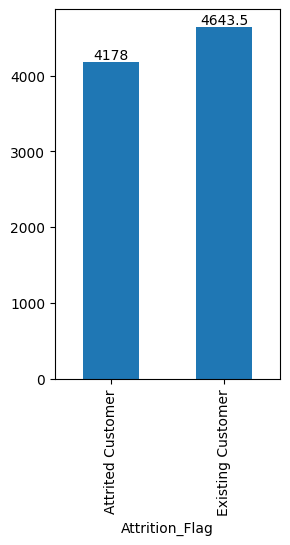

In [24]:
plt.figure(1)
plt.subplot(1, 2, 1)
a = df.groupby('Attrition_Flag')['Credit_Limit'].median().plot.bar()
plt.bar_label(a.containers[0])


So considering the median value, attrited customers had a credit limit of 4178 dollars while the existing customers have a credit limit of around 4648 dollars. This suggests that, in terms of credit limits, existing customers tend to have a slightly more favorable financial profile than attrited customers.

Now,  i will look at the mean Total_revolving_balance of the customers who have left and did not lef the account

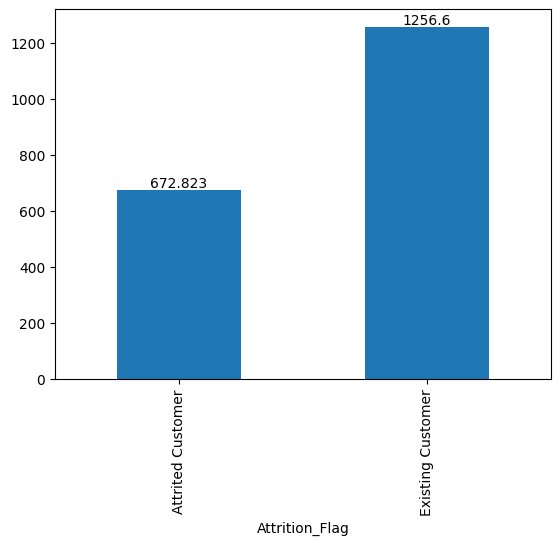

In [25]:
a = df.groupby('Attrition_Flag')['Total_Revolving_Bal'].mean().plot.bar()
plt.bar_label(a.containers[0])
plt.show()

The average total revolving balance of existing customers is more than the attrited customers. The insight here is that, on average, customers who have not left the account tend to maintain a higher total revolving balance compared to those who have attrited. This suggests that customers who stay with the company tend to have a higher level of credit card usage or outstanding balances.

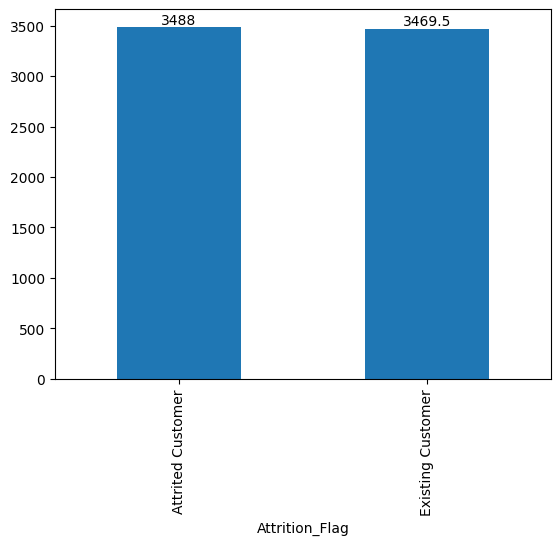

In [26]:
a = df.groupby('Attrition_Flag')['Avg_Open_To_Buy'].median().plot.bar()
plt.bar_label(a.containers[0])
plt.show()

Here the y-axis represents the Avg_Open_To_Buy. We don’t see any change in the median value of both. So, let’s make bins for the Avg_Open_To_Buy variable based on the values in it and analyze the corresponding Attrited flag for each bin.

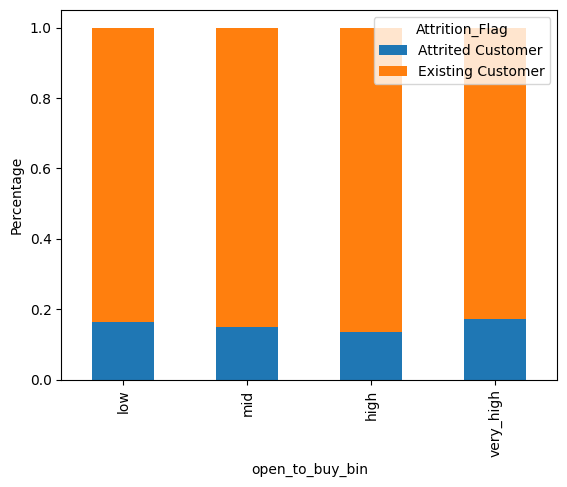

In [27]:
bins = [0, 10000, 20000, 30000, 40000]
group = ['low', "mid", "high", "very_high"]

df['open_to_buy_bin']=pd.cut(df['Avg_Open_To_Buy'],bins,labels=group)
open_to_buy_bin = pd.crosstab(df['open_to_buy_bin'],df['Attrition_Flag']) 
open_to_buy_bin.div(open_to_buy_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('open_to_buy_bin') 
P = plt.ylabel('Percentage')

It can be inferred that Avg_Open_To_Buy does not affect the Attrition_Flag

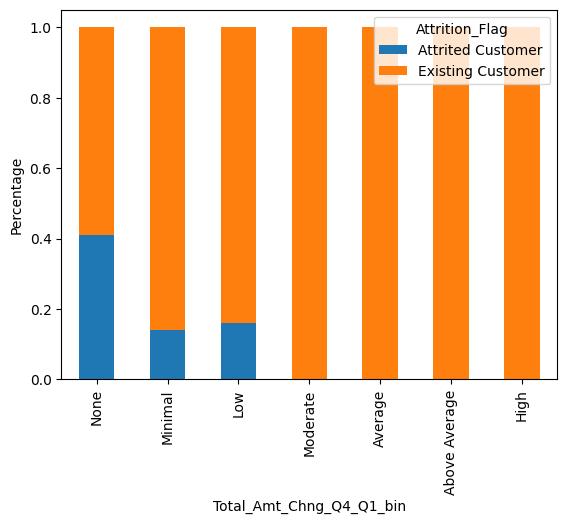

In [28]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
group = ["None", "Minimal","Low","Moderate", "Average", "Above Average", "High"]

df['Total_Amt_Chng_Q4_Q1_bin']=pd.cut(df['Total_Amt_Chng_Q4_Q1'],bins,labels=group)
Total_Amt_Chng_Q4_Q1_bin = pd.crosstab(df['Total_Amt_Chng_Q4_Q1_bin'],df['Attrition_Flag']) 
Total_Amt_Chng_Q4_Q1_bin.div(Total_Amt_Chng_Q4_Q1_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Amt_Chng_Q4_Q1_bin') 
P = plt.ylabel('Percentage')

It can be concluded that 'Total_Amt_Chng_Q4_Q1' that is somewhere between 0.0 to 1.0 has most of the effect on Attrited customers

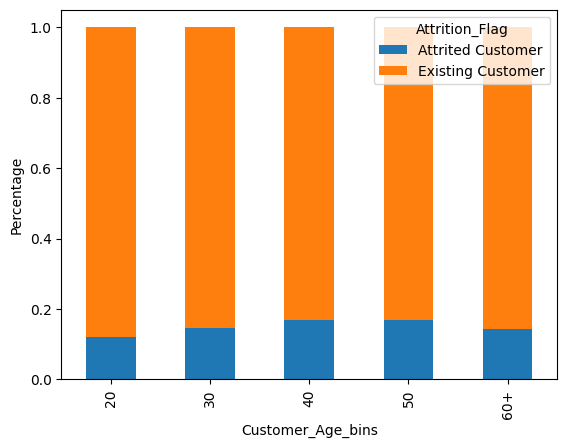

In [29]:
bins = [20, 30, 40, 50, 60, 73]
group = ["20", "30","40", "50", "60+"]

df['Customer_Age_bins']=pd.cut(df['Customer_Age'],bins,labels=group)
Customer_Age_bins = pd.crosstab(df['Customer_Age_bins'],df['Attrition_Flag']) 
Customer_Age_bins.div(Customer_Age_bins.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Customer_Age_bins') 
P = plt.ylabel('Percentage')

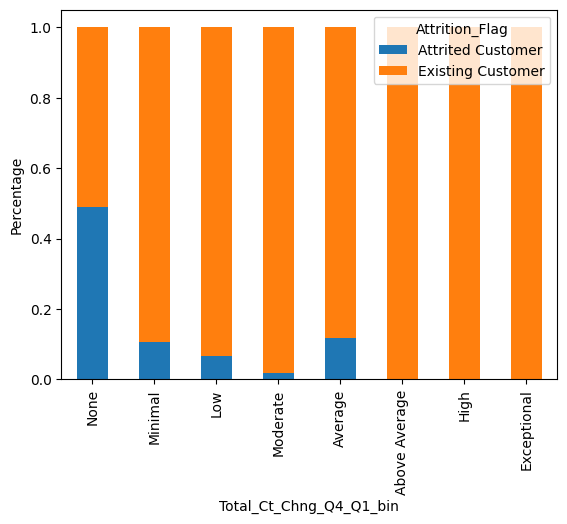

In [30]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
group = ["None", "Minimal","Low","Moderate", "Average", "Above Average", "High", "Exceptional"]

df['Total_Ct_Chng_Q4_Q1_bin']=pd.cut(df['Total_Ct_Chng_Q4_Q1'],bins,labels=group)
Total_Ct_Chng_Q4_Q1_bin = pd.crosstab(df['Total_Ct_Chng_Q4_Q1_bin'],df['Attrition_Flag']) 
Total_Ct_Chng_Q4_Q1_bin.div(Total_Ct_Chng_Q4_Q1_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Ct_Chng_Q4_Q1_bin') 
P = plt.ylabel('Percentage')

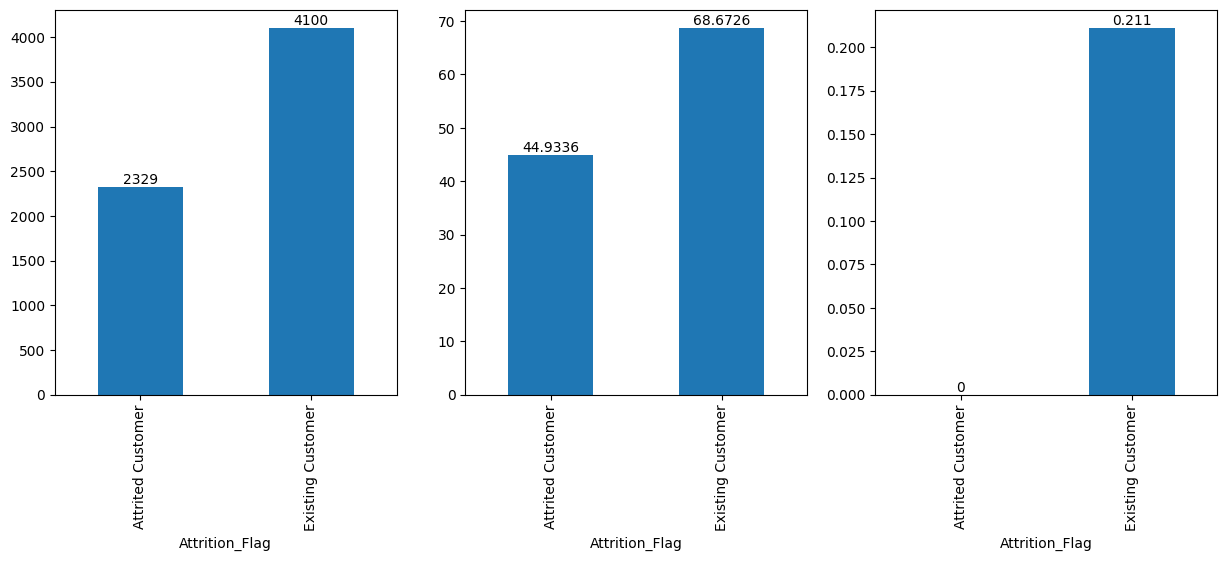

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
a = df.groupby('Attrition_Flag')['Total_Trans_Amt'].median().plot.bar()
plt.bar_label(a.containers[0])

plt.subplot(1, 3, 2)
a = df.groupby('Attrition_Flag')['Total_Trans_Ct'].mean().plot.bar()
plt.bar_label(a.containers[0])

plt.subplot(1, 3, 3)
a = df.groupby('Attrition_Flag')['Avg_Utilization_Ratio'].median().plot.bar()
plt.bar_label(a.containers[0])

plt.show()

Let’s drop the bins which we created for the exploration part.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.

In [32]:
df.drop(['open_to_buy_bin', 'Total_Amt_Chng_Q4_Q1_bin', 'Customer_Age_bins',
       'Total_Ct_Chng_Q4_Q1_bin'], axis = 1, inplace=True)

In [33]:
df['Attrition_Flag'].replace("Existing Customer", 0, inplace=True)
df['Attrition_Flag'].replace("Attrited Customer", 1, inplace=True)

Attrition_Flag (customer activity) variable - if the account is closed then 1 else 0

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

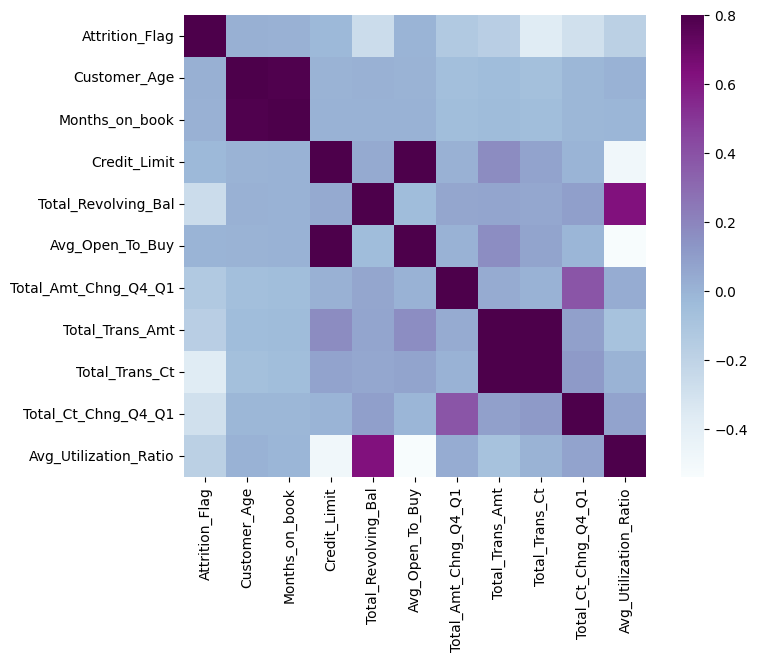

In [34]:
matrix = df[df.select_dtypes(["int","float"]).columns].corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

The above heatmap shows correlation between all the numerical variables. We see that the most correlated variables are: (Customer_Age - Months_on_book), (Avg_Open_To_Buy - Credit_Limit), (Total_Trans_Amt - Total_Trans_Ct). Since these variable are highly correlated I can drop one from each of them

In [35]:
df.drop(['Months_on_book','Avg_Open_To_Buy','Total_Trans_Amt'], axis=1, inplace=True)

Check for missing values

In [36]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no null values in this dataset

![](http://)## Outlier Treatment
We saw earlier in the univariate analysis that Customer_Age, Credit_Limit, Total_Amt_Chng_Q4_Q1, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1  containds outliers so we have to treat them as the presence of outliers affects the distribution of the data.

Let's start with Customer_Age, it has only one outlier

<Axes: xlabel='Customer_Age', ylabel='Density'>

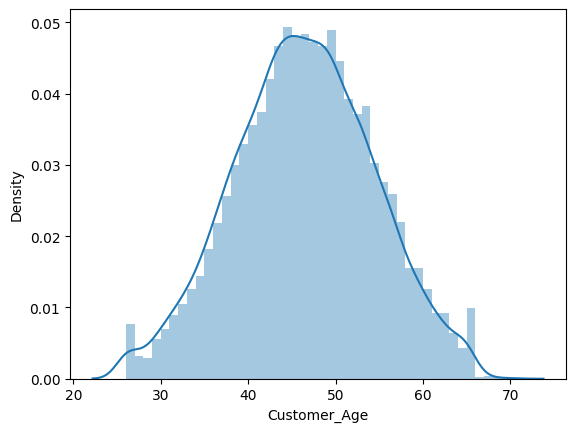

In [37]:
df.loc[df['Customer_Age']>70,'Customer_Age'] = 70
sns.distplot(df['Customer_Age'])

Since Credit Limit is extremely right skewed i'll use boxcox transformation on it

<Axes: >

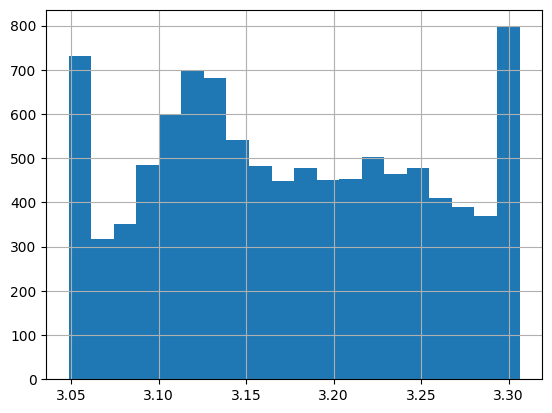

In [38]:
from scipy import stats

df['Credit_Limit'], lambda_val= stats.boxcox(df['Credit_Limit'])
df['Credit_Limit'].hist(bins=20)

I'll treat few outliers in Total_Amt_Chng_Q4_Q1 with ** arcsinh (inverse hyperbolic sine)**

<Axes: >

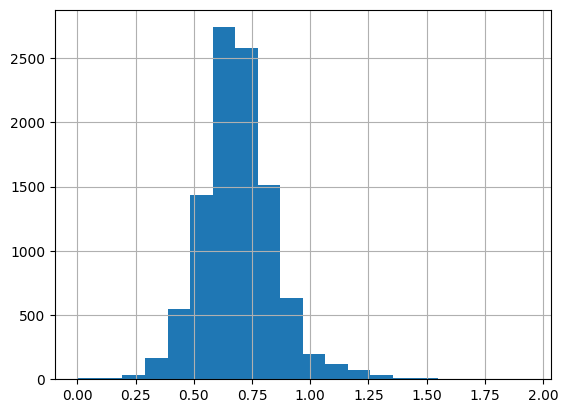

In [39]:
df['Total_Amt_Chng_Q4_Q1']= np.arcsinh(df['Total_Amt_Chng_Q4_Q1'])
df['Total_Amt_Chng_Q4_Q1'].hist(bins=20)

Looking at the distribution of Total_Trans_Ct, it's not extremely right skewed so it wont be optimal to use log transformation here, so ill go with square root transformation

<Axes: >

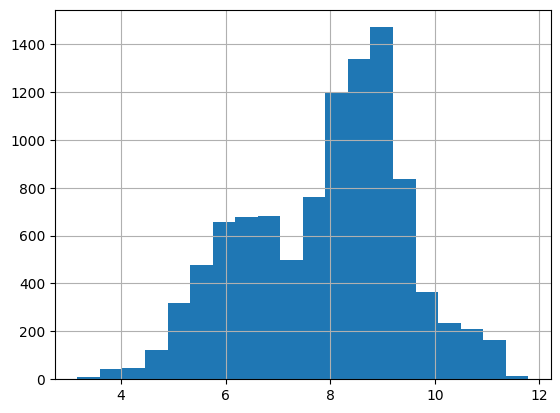

In [40]:
import scipy.stats as stats

lambda_value = "auto"
df['Total_Trans_Ct'] = np.sqrt(df['Total_Trans_Ct'])
df['Total_Trans_Ct'].hist(bins=20)

I'll treat few outliers of Total_Ct_Chng_Q4_Q1 feature  **arcsinh (inverse hyperbolic sine)**

<Axes: >

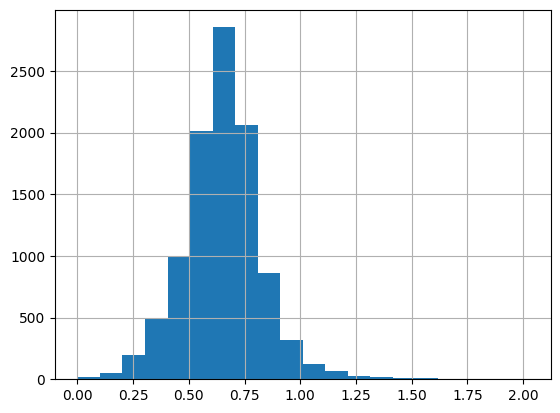

In [41]:
df['Total_Ct_Chng_Q4_Q1']= np.arcsinh(df['Total_Ct_Chng_Q4_Q1'])
df['Total_Ct_Chng_Q4_Q1'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

I will also convert the age into catwgorical variable because I believe it works better that way

In [42]:
bins = [20, 30, 40, 50, 60, 73]
group = ["20", "30","40", "50", "60+"]

df['Customer_Age']=pd.cut(df['Customer_Age'],bins,labels=group)

## Splitting the Dataset

In [43]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [44]:
x_ohe =  pd.get_dummies(X)
x_ohe.replace({True:1, False:0})

,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age_20,Customer_Age_30,Customer_Age_40,Customer_Age_50,...,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_0,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
0,3.248734,777,1.099612,6.480741,1.262159,0.061,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,3.218468,864,1.217293,5.744563,2.022907,0.105,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3.143353,0,1.681587,4.472136,1.583358,0.000,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3.140331,2517,1.140885,4.472136,1.583358,0.760,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,3.173000,0,1.519266,5.291503,1.647231,0.000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,3.158246,1851,0.655123,10.816654,0.776562,0.462,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10123,3.164290,2186,0.735789,8.306624,0.638684,0.511,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10124,3.184818,0,0.747436,7.745967,0.746662,0.000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10125,3.182787,0,0.512296,7.874008,0.670597,0.000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ohe, y, test_size=0.3)

## **Model Building**
I'll be focusing on increasing the precision score here because we might want to prioritize precision if reducing false positives (incorrectly identifying loyal customers as churners) is crucial for our business. Balancing these metrics can be adjusted based on our business's specific objectives and costs associated with false positives and false negatives.

### **Logistic Regression**
Since now we have converted all theategorical variables into numerical, we can train a logistic regression model.
I'll start by training a base model with no transformations and later compare the accuracy of both
Note: It is an imbalance classification dataset

**Train the model without handling the imbalanced class distribution**

In [46]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, balanced_accuracy_score
from sklearn.metrics import classification_report

predictions = lg.predict(X_test)
print(f'Precision score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Precision score: 0.7675070028011205
0.7716231635065263
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2563
           1       0.77      0.58      0.66       476

    accuracy                           0.91      3039
   macro avg       0.85      0.77      0.80      3039
weighted avg       0.90      0.91      0.90      3039



**The accuracy comes out to be 91% but did you notice something strange ?** 
The recall and precision of the minority class in very less. It proves that the model is more biased towards majority class. So, it proves that this is not the best model.

Now, we will apply different **imbalanced data handling techniques** and see their accuracy, precision and recall results.

### Using SMOTE Algorithm

In [48]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1151
Before OverSampling, counts of label '0': 5937 

After OverSampling, the shape of train_X: (11874, 60)
After OverSampling, the shape of train_y: (11874,) 

After OverSampling, counts of label '1': 5937
After OverSampling, counts of label '0': 5937 



Look! that SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.
Now see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

In [49]:
lg1 = LogisticRegression()
lg1.fit(X_train_res, y_train_res.ravel())

predictions = lg1.predict(X_test)
print(f'Precision score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Precision score: 0.7126696832579186
0.8061066994101581
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2563
           1       0.71      0.66      0.69       476

    accuracy                           0.91      3039
   macro avg       0.83      0.81      0.82      3039
weighted avg       0.90      0.91      0.90      3039



We have reduced the accuracy to 90% as compared to previous model but the balanced accuracy has increased to 79%. This is a okay model compared to the previous one.


Now, we will apply NearMiss technique to Under-sample the majority class and see its accuracy and recall results

### NearMiss Algorithm

In [50]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 1151
Before Undersampling, counts of label '0': 5937 

After Undersampling, the shape of train_X: (2302, 60)
After Undersampling, the shape of train_y: (2302,) 

After Undersampling, counts of label '1': 1151
After Undersampling, counts of label '0': 1151


In [51]:
lg2 = LogisticRegression()
lg2.fit(X_train_miss, y_train_miss.ravel())

predictions = lg2.predict(X_test)

print(f'Precision score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Precision score: 0.38984674329501917
0.8032525729761276
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      2563
           1       0.39      0.86      0.54       476

    accuracy                           0.77      3039
   macro avg       0.68      0.80      0.69      3039
weighted avg       0.88      0.77      0.80      3039



This model is better than the very first model because the balamced accuracy is 78 %. But due to undersampling of majority class, its recall has decreased to 82% also the precision has been heavily affected. So in this case, SMOTE is giving me a better results! 

### **Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(class_weight="balanced")
gs = GridSearchCV(dt, {"max_depth":[15,20,25], "min_samples_split": [0.005, 0.01, 0.05], "criterion": ['gini', 'entropy']}, n_jobs=-1, cv=5, scoring="balanced_accuracy")

gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25],
                         'min_samples_split': [0.005, 0.01, 0.05]},
             scoring='balanced_accuracy')

In [53]:
print(gs.best_score_)
print(gs.best_params_)

0.9134994284320317
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 0.005}


Store the best model_estimators in a new variable that we can try to interpret later

In [54]:
dt_model = gs.best_estimator_

After balancing your data using SMOTE or similar techniques, it's generally recommended to use the Balanced Accuracy Score for model evaluation, as it provides a better indication of how well your model performs across all classes, especially when dealing with imbalanced datasets.

In [55]:
from sklearn.metrics import balanced_accuracy_score,precision_score

dt_predictions = dt_model.predict(X_test)
print("Training Results")
print(f'Precision Score: {precision_score(y_train_res, dt_model.predict(X_train_res))}')
print(f'Balanced accuracy: {balanced_accuracy_score(y_train_res, dt_model.predict(X_train_res))}')
print(f'{classification_report(y_train_res, dt_model.predict(X_train_res))}\n\n')

print("Testing Results")
print(f'Precision Score: {precision_score(y_test, dt_predictions)}')
print(f"Balanced accuracy = {balanced_accuracy_score(y_test, dt_predictions)}")
print(classification_report(y_test, dt_predictions))

Training Results
Precision Score: 0.9349660764520933
Balanced accuracy: 0.9427320195384874
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5937
           1       0.93      0.95      0.94      5937

    accuracy                           0.94     11874
   macro avg       0.94      0.94      0.94     11874
weighted avg       0.94      0.94      0.94     11874



Testing Results
Precision Score: 0.6380789022298456
Balanced accuracy = 0.8495936025600253
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2563
           1       0.64      0.78      0.70       476

    accuracy                           0.90      3039
   macro avg       0.80      0.85      0.82      3039
weighted avg       0.91      0.90      0.90      3039



**Interpreting the results**

the model appears to perform well in classifying the majority class (class 0) with high precision, recall, and F1-score. However, it has a lower F1-score for the minority class (class 1), indicating that there may be room for improvement in correctly identifying class 1 instances. The balanced accuracy score of approximately 0.85 suggests that, on average, the model performs well in maintaining a balance between sensitivity and specificity.

### **Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier
'''param_grid = {'n_estimators': [50,100,200], 
              "max_depth": [30, 50, 70, None], 
              "min_samples_split":[2,5,10], 
              "min_samples_leaf": [1,2,4], 
              'class_weight': [None, 'balanced']}'''

best_param = {
    'n_estimators': [300],
    'max_depth': [50],  # Set max depth
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=1)
forest_gs = GridSearchCV(
    estimator=rf,
    param_grid=best_param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
forest_gs.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [50],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [300]},
             scoring='accuracy')

In [57]:
print(forest_gs.best_params_)
print(forest_gs.best_score_)

{'class_weight': 'balanced', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.957472052498559


In [58]:
rf_model = forest_gs.best_estimator_

In [59]:
print("Training Results")
print(f'{accuracy_score(y_train_res, rf_model.predict(X_train_res))}')
print(f'Precision Score: {precision_score(y_train_res, rf_model.predict(X_train_res))}')
print(f'{classification_report(y_train_res, rf_model.predict(X_train_res))}\n\n')

print("Testing Results")
rf_predictions = rf_model.predict(X_test)
print(f'Precision Score: {precision_score(y_test, dt_predictions)}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))

Training Results
1.0
Precision Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5937
           1       1.00      1.00      1.00      5937

    accuracy                           1.00     11874
   macro avg       1.00      1.00      1.00     11874
weighted avg       1.00      1.00      1.00     11874



Testing Results
Precision Score: 0.6380789022298456
Balanced Accuracy: 0.8546514391944839
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2563
           1       0.83      0.74      0.78       476

    accuracy                           0.94      3039
   macro avg       0.89      0.85      0.87      3039
weighted avg       0.93      0.94      0.93      3039



**Interpreting the results**

The model seems to perform well, with high precision and recall for class 0 and reasonable values for class 1. The balanced accuracy 84% on test set and 100% on training with suggest overfitting

### **XGBoost Tree**

In [60]:
from xgboost.sklearn import XGBClassifier
'''parameters = {'learning_rate': [0.01, 0.1, 0.3],
    'colsample_bytree': [0.6, 0.8, 1.0],

    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 7],
    'gamma': [0, 0.1, 0.2],
    'objective': ['binary:logistic']  # For binary classification
}'''

parameters = {'learning_rate': [0.1],
            'colsample_bytree': [1.0],
            'n_estimators': [100],
            'max_depth': [8],
            'gamma': [0.2],
            'objective': ['binary:logistic']# For binary classification
}

xg_boost = XGBClassifier()

gs_model = GridSearchCV(estimator= xg_boost, param_grid = parameters,
                          n_jobs=-1,
                          cv = 5,
                          verbose=True)

gs_model.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'gamma': [0.2],
                         'learning_rate': [0.1], 'max_depth': [8],
                         'n_estimators': [100],
                         'objective': ['binary:logistic']},
             verbose=True)

In [61]:
print(gs_model.best_params_)
print(gs_model.best_score_)

{'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'objective': 'binary:logistic'}
0.9464402607191948


In [62]:
xg_model = gs_model.best_estimator_

In [63]:
print("Training Results")
print(f'{balanced_accuracy_score(y_train_res, xg_model.predict(X_train_res))}')
print(f'Precision Score: {precision_score(y_train_res, xg_model.predict(X_train_res))}')
print(f'{classification_report(y_train_res, xg_model.predict(X_train_res))}\n\n')

print("Testing Results")
xg_predictions = xg_model.predict(X_test)
print(f'Precision Score: {precision_score(y_test, xg_predictions)}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, xg_predictions)}")
print(classification_report(y_test, xg_predictions))

Training Results
0.9914098029307731
Precision Score: 0.992571332095222
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5937
           1       0.99      0.99      0.99      5937

    accuracy                           0.99     11874
   macro avg       0.99      0.99      0.99     11874
weighted avg       0.99      0.99      0.99     11874



Testing Results
Precision Score: 0.8226164079822617
Balanced Accuracy: 0.8740991714672603
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2563
           1       0.82      0.78      0.80       476

    accuracy                           0.94      3039
   macro avg       0.89      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



**Interpreting the results**

The model seems to be doing reasonably well in than the models before this, with balanced accuracy of 86% and the precision for minority class is 81% which suggest we need to perform more hyperparameter tuning to achieve better results

In [64]:
import _pickle as cPickle
with open("XGBoost_base_model.pkl", "wb") as f:
    cPickle.dump(xg_model, f)

### **Light XGB**

In [65]:
import lightgbm as lgb

'''params = {
    'num_leaves': [15, 30, 45],
    'max_depth': [6, 8,10],
    'min_child_samples': [10, 20, 30],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate':[0.05, 0.1],
    'n_estimators': [100,200],
    'reg_alpha': [0.5, 1.0],
    'reg_lambda': [0.5, 1.0],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'random_state' :  [42]
}'''

params = {
    'num_leaves': [45],
    'max_depth': [10],
    'min_child_samples': [20],
    'colsample_bytree': [0.8],
    'learning_rate':[ 0.1],
    'n_estimators': [100],
    'reg_alpha': [1.0],
    'reg_lambda': [0.5],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'random_state' :  [42]
}

lgb_model = lgb.LGBMClassifier()
lgb_model = GridSearchCV(estimator= lgb_model, param_grid = params, n_jobs=-1, cv = 5, scoring='accuracy')

lgb_model.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'max_depth': [10], 'metric': ['binary_logloss'],
                         'min_child_samples': [20], 'n_estimators': [100],
                         'num_leaves': [45], 'objective': ['binary'],
                         'random_state': [42], 'reg_alpha': [1.0],
                         'reg_lambda': [0.5]},
             scoring='accuracy')

In [66]:
print(lgb_model.best_params_)
print(lgb_model.best_score_)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'metric': 'binary_logloss', 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 45, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1.0, 'reg_lambda': 0.5}
0.9468614907107702


In [67]:
lgb_estimator = lgb_model.best_estimator_

In [68]:
print("Training Results")
print(f'{accuracy_score(y_train_res, lgb_estimator.predict(X_train_res))}')
print(f'Precision Score: {precision_score(y_train_res, lgb_model.predict(X_train_res))}')
print(f'{classification_report(y_train_res, lgb_model.predict(X_train_res))}\n\n')

print("Testing Results")
lgb_predictions = lgb_estimator.predict(X_test)
print(f'Precision Score: {precision_score(y_test, lgb_predictions)}')
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, lgb_predictions)}")
print(classification_report(y_test, lgb_predictions))

Training Results
0.9882937510527202
Precision Score: 0.9896959459459459
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5937
           1       0.99      0.99      0.99      5937

    accuracy                           0.99     11874
   macro avg       0.99      0.99      0.99     11874
weighted avg       0.99      0.99      0.99     11874



Testing Results
Precision Score: 0.8215859030837004
Balanced Accuracy: 0.8760049279173238
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2563
           1       0.82      0.78      0.80       476

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.88      3039
weighted avg       0.94      0.94      0.94      3039



**Interpreting the results**

XGBoost and Light XGBoost both shows almost similar results, the precision is 83% which is better than XGBoost model.

**Light XGBoost shows best results**

In [69]:
with open("LXGBoost_base_model.pkl", "wb") as f:
    cPickle.dump(lgb_estimator, f)

## **Feature Selection**

In [70]:
import eli5
from eli5.sklearn import PermutationImportance


### **XG Boost**

In [71]:
with open("XGBoost_base_model.pkl", "rb") as f:
    xg_model = cPickle.load(f)

eli5.show_weights(xg_model, feature_names=list(X_train_res.columns))

Weight,Feature
0.0872,Total_Trans_Ct
0.0719,Customer_Age_40
0.0648,Total_Relationship_Count_1
0.0612,Total_Relationship_Count_2
0.0529,Total_Revolving_Bal
0.0373,Gender_M
0.0370,Gender_F
0.0253,Marital_Status_Married
0.0233,Months_Inactive_12_mon_3
0.0229,Total_Ct_Chng_Q4_Q1


In [72]:
perm = PermutationImportance(xg_model, random_state=1).fit(X_train_res, y_train_res)

feature_importances = eli5.explain_weights(perm, feature_names=list(X_train_res.columns))

# Extract the top 15 features based on importance scores
top_features = [feature[0] for feature in eli5.formatters.as_dataframe.format_as_dataframe(feature_importances).sort_values(by='weight', ascending=False)[:30].values]


In [73]:
X_new_train = X_train_res[top_features]
X_new_test = X_test[top_features]

xg_model.fit(X_new_train, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [74]:
print("Training Results")
predictions = xg_model.predict(X_new_train)
print(f'Precision Score: {precision_score(y_train_res,predictions)}')
print(balanced_accuracy_score(y_train_res, predictions))
print(f'{classification_report(y_train_res, predictions)}\n\n')

print("Testing Results")
predictions = xg_model.predict(X_new_test)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Training Results
Precision Score: 0.9896959459459459
0.9882937510527203
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5937
           1       0.99      0.99      0.99      5937

    accuracy                           0.99     11874
   macro avg       0.99      0.99      0.99     11874
weighted avg       0.99      0.99      0.99     11874



Testing Results
Precision Score: 0.784394250513347
0.8807766961642246
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2563
           1       0.78      0.80      0.79       476

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.88      3039
weighted avg       0.94      0.93      0.93      3039



### **Light XGBoost**

In [75]:
eli5.show_weights(lgb_estimator, feature_names=list(X_train_res.columns))

Weight,Feature
0.3280,Total_Trans_Ct
0.1125,Total_Revolving_Bal
0.0936,Total_Ct_Chng_Q4_Q1
0.0601,Total_Relationship_Count_2
0.0474,Total_Relationship_Count_1
0.0381,Total_Amt_Chng_Q4_Q1
0.0368,Avg_Utilization_Ratio
0.0295,Credit_Limit
0.0257,Customer_Age_40
0.0217,Months_Inactive_12_mon_3


In [76]:
perm = PermutationImportance(lgb_estimator, random_state=1).fit(X_train_res, y_train_res)

feature_importances = eli5.explain_weights(perm, feature_names=list(X_train_res.columns))

# Extract the top 15 features based on importance scores
top_features = [feature[0] for feature in eli5.formatters.as_dataframe.format_as_dataframe(feature_importances).sort_values(by='weight', ascending=False)[:20].values]


In [77]:
X_new_train = X_train_res[top_features]
X_new_test = X_test[top_features]

lgb_estimator.fit(X_new_train, y_train_res)

LGBMClassifier(colsample_bytree=0.8, max_depth=10, metric='binary_logloss',
               num_leaves=45, objective='binary', random_state=42,
               reg_alpha=1.0, reg_lambda=0.5)

In [78]:
print("Training Results")
predictions = lgb_estimator.predict(X_new_train)
print(f'Precision Score: {precision_score(y_train_res,predictions)}')
print(balanced_accuracy_score(y_train_res, predictions))
print(f'{classification_report(y_train_res, predictions)}\n\n')

print("Testing Results")
predictions = lgb_estimator.predict(X_new_test)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Training Results
Precision Score: 0.9821668909825033
0.9827353882432204
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5937
           1       0.98      0.98      0.98      5937

    accuracy                           0.98     11874
   macro avg       0.98      0.98      0.98     11874
weighted avg       0.98      0.98      0.98     11874



Testing Results
Precision Score: 0.7739307535641547
0.8775053525116641
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2563
           1       0.77      0.80      0.79       476

    accuracy                           0.93      3039
   macro avg       0.87      0.88      0.87      3039
weighted avg       0.93      0.93      0.93      3039



Feature selection did not really help in increasing the precision score or balance accuracy, so I will try some other methids to stop the overfitting like Applying **Early Stopping** and **Regularization**

## **Early Stopping**
 Implement early stopping during training. This means monitoring your model's performance on a validation set and stopping training when the performance starts to degrade. This can prevent the model from learning noise in the training data.

### Early Stopping on XGBoost

In [79]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 1,
    'max_depth': 8,
    'gamma': 0.2,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'random_state': 42
}

# Create an empty dictionary to store evaluation results
evals_result = {}

# Train the XGBoost model with early stopping
xgb_es_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=1000,  # You can adjust this number as needed
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    evals_result=evals_result,
    verbose_eval= 50
)

# Predict on the test set
y_pred = xgb_es_model.predict(dtest, ntree_limit=xgb_es_model.best_iteration)

# Calculate the accuracy
accuracy = balanced_accuracy_score(y_test, (y_pred > 0.5).astype(int))
print(f'Accuracy with XGBoost and early stopping: {accuracy}')

[08:20:53] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-logloss:0.61956	test-logloss:0.62632
[50]	train-logloss:0.07437	test-logloss:0.16663
[100]	train-logloss:0.04130	test-logloss:0.15353
[109]	train-logloss:0.03762	test-logloss:0.15366
Accuracy with XGBoost and early stopping: 0.8742942553533313


In [80]:
dnew_train = xgb.DMatrix(X_train_res)
predictions = (predictions > 0.5).astype(int)

print("Training Results")
predictions = xgb_es_model.predict(dnew_train)
predictions = (predictions > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_train_res,predictions)}')
print(balanced_accuracy_score(y_train_res, predictions))
print(f'{classification_report(y_train_res, predictions)}\n\n')

dnew_test = xgb.DMatrix(X_test)
print("Testing Results")
predictions = xgb_es_model.predict(dnew_test)
predictions = (predictions > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Training Results
Precision Score: 0.9930836707152496
0.9923361967323564
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5937
           1       0.99      0.99      0.99      5937

    accuracy                           0.99     11874
   macro avg       0.99      0.99      0.99     11874
weighted avg       0.99      0.99      0.99     11874



Testing Results
Precision Score: 0.8333333333333334
0.8742192546156191
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2563
           1       0.83      0.78      0.80       476

    accuracy                           0.94      3039
   macro avg       0.90      0.87      0.88      3039
weighted avg       0.94      0.94      0.94      3039



In [81]:
with open("XGBoost_Early_stopping.pkl", "wb") as f:
    cPickle.dump(xgb_es_model, f)

### Early Stopping on Light XGBoost

In [83]:
# Create a LightGBM dataset
dtrain = lgb.Dataset(X_train_res, label=y_train_res)

# Define the XGBoost parameters
lgb_params = {
     'objective': 'binary',
    'max_depth': 10,
    'metric': 'binary_logloss',
    'num_leaves': 45,
    'min_child_samples': 20,
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'n_estimators': 1500,  # You can set a large number
    'early_stopping_rounds': 10,  # Stop if no improvement in 10 rounds
    'verbose': -1
}


# Create an empty dictionary to store evaluation results
evals_result = {}

# Train the XGBoost model with early stopping
lgb_es_model = lgb.train(
    lgb_params,
    dtrain,
    valid_sets=[dtrain],  # Use the same dataset for validation
    valid_names=['train'],  # Name for the validation dataset
    verbose_eval= 200
)

best_iteration = lgb_es_model.best_iteration
y_pred = lgb_es_model.predict(X_test, num_iteration=best_iteration)


Training until validation scores don't improve for 10 rounds
[200]	train's binary_logloss: 0.0095937
[400]	train's binary_logloss: 0.000774159
[600]	train's binary_logloss: 6.88479e-05
[800]	train's binary_logloss: 6.92544e-06
[1000]	train's binary_logloss: 2.3441e-06
[1200]	train's binary_logloss: 1.51946e-06
[1400]	train's binary_logloss: 1.1908e-06
Did not meet early stopping. Best iteration is:
[1500]	train's binary_logloss: 1.0953e-06


In [84]:
print("Training Results")
y_pred_train = lgb_es_model.predict(X_train_res, num_iteration=best_iteration)
predictions = (y_pred_train > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_train_res, predictions)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_train_res, predictions)}')
print(classification_report(y_train_res, predictions))


print("Testing Results")
y_pred = lgb_es_model.predict(X_test, num_iteration=best_iteration)
predictions = (y_pred > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions))

Training Results
Precision Score: 1.0
Balanced Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5937
           1       1.00      1.00      1.00      5937

    accuracy                           1.00     11874
   macro avg       1.00      1.00      1.00     11874
weighted avg       1.00      1.00      1.00     11874

Testing Results
Precision Score: 0.8400900900900901
Balanced Accuracy: 0.8779557667780339
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2563
           1       0.84      0.78      0.81       476

    accuracy                           0.94      3039
   macro avg       0.90      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



It works!! Early stopping increased the precision score of the model to 85%, which means that the model stoped training when it started to learn the noise in the model, which is a good improvement. I'm going to store this model in a pickle file

In [85]:
with open("LXGBoost_early_stopping.pkl", "wb") as f:
    cPickle.dump(lgb_es_model, f)

### **Applying Regularization on XGBoost**

Regularization: Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can help reduce overfitting. They add a penalty term to the loss function, discouraging large weights on features. code for this



In [86]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'colsample_bytree': 1,
    'max_depth': 8,
    'gamma': 0.2,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'reg_alpha': 1.0,
    'random_state': 42
}

# Create an empty dictionary to store evaluation results
evals_result = {}

# Train the XGBoost model with early stopping
xgb_es_model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=1000,  # You can adjust this number as needed
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    evals_result=evals_result,
    verbose_eval= 50
)

# Predict on the test set
y_pred = xgb_es_model.predict(dtest, ntree_limit=xgb_es_model.best_iteration)

# Calculate the accuracy
accuracy = balanced_accuracy_score(y_test, (y_pred > 0.5).astype(int))
print(f'Accuracy with XGBoost and early stopping: {accuracy}')

[08:47:11] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-logloss:0.62092	test-logloss:0.62642
[50]	train-logloss:0.08030	test-logloss:0.16851
[100]	train-logloss:0.04515	test-logloss:0.15452
[141]	train-logloss:0.03162	test-logloss:0.15411
Accuracy with XGBoost and early stopping: 0.8790811876838133


In [87]:
dnew_train = xgb.DMatrix(X_train_res)
predictions = (predictions > 0.5).astype(int)

print("Training Results")
predictions = xgb_es_model.predict(dnew_train)
predictions = (predictions > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_train_res,predictions)}')
print(balanced_accuracy_score(y_train_res, predictions))
print(f'{classification_report(y_train_res, predictions)}\n\n')

dnew_test = xgb.DMatrix(X_test)
print("Testing Results")
predictions = xgb_es_model.predict(dnew_test)
predictions = (predictions > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(balanced_accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Training Results
Precision Score: 0.9966216216216216
0.995199595755432
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5937
           1       1.00      0.99      1.00      5937

    accuracy                           1.00     11874
   macro avg       1.00      1.00      1.00     11874
weighted avg       1.00      1.00      1.00     11874



Testing Results
Precision Score: 0.82560706401766
0.8774455158575329
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2563
           1       0.83      0.79      0.81       476

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



Applying regularization helps in reducing the overfitting. For XGBoost I have applied reg_alpha = 1.0 and it gave me a balanced accuracy of 87% which is the highest we've achieved so far and the precision score of 83%

### **Applying Regularization on Light XGBoost**


In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the training and testing data
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Create a LightGBM dataset using the standardized data
dtrain = lgb.Dataset(X_train_scaled, label=y_train_res)

# Define the XGBoost parameters with regularization
lgb_params = {
    'objective': 'binary',
    'max_depth': 10,
    'metric': 'binary_logloss',
    'num_leaves': 45,
    'min_child_samples': 20,
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'early_stopping_rounds': 10,
    'verbose': -1,
    'reg_alpha': 0.5,  # L1 regularization term
}

# Create an empty dictionary to store evaluation results
evals_result = {}

# Train the LightGBM model with early stopping and regularization
model =  lgb.train(
    lgb_params,
    dtrain,
    valid_sets=[dtrain],  # Use the same dataset for validation
    valid_names=['train'],  # Name for the validation dataset
    verbose_eval= 100
)

best_iteration = model.best_iteration
y_pred = model.predict(X_test_scaled, num_iteration=best_iteration)


Training until validation scores don't improve for 10 rounds
[100]	train's binary_logloss: 0.0389747
[200]	train's binary_logloss: 0.0136328
[300]	train's binary_logloss: 0.00750805
[400]	train's binary_logloss: 0.00545394
[500]	train's binary_logloss: 0.00511597
[600]	train's binary_logloss: 0.00511597
[700]	train's binary_logloss: 0.00511597
[800]	train's binary_logloss: 0.00511597
[900]	train's binary_logloss: 0.00511597
[1000]	train's binary_logloss: 0.00511597
Did not meet early stopping. Best iteration is:
[459]	train's binary_logloss: 0.00511597


In [89]:
print("Training Results")
y_pred_train = model.predict(X_train_scaled, num_iteration=best_iteration)
predictions = (y_pred_train > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_train_res, predictions)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_train_res, predictions)}')
print(classification_report(y_train_res, predictions))


print("Testing Results")
y_pred = model.predict(X_test_scaled, num_iteration=best_iteration)
predictions = (y_pred > 0.5).astype(int)
print(f'Precision Score: {precision_score(y_test, predictions)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions))

Training Results
Precision Score: 1.0
Balanced Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5937
           1       1.00      1.00      1.00      5937

    accuracy                           1.00     11874
   macro avg       1.00      1.00      1.00     11874
weighted avg       1.00      1.00      1.00     11874

Testing Results
Precision Score: 0.8385650224215246
Balanced Accuracy: 0.8788111030600301
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2563
           1       0.84      0.79      0.81       476

    accuracy                           0.94      3039
   macro avg       0.90      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



For Light XGBoost I have applied reg_alpha = 0.5 and it gave me a balanced accuracy of 87%similar to the XGBoost and the precision score of 84% which is one percent higher than XGBoost